# KPI 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import warnings

plt.rc("font", family = "AppleGothic")
sns.set(font="AppleGothic", rc={"axes.unicode_minus":False}, style='white')

warnings.filterwarnings('ignore')
plt.style.use('ggplot')


In [2]:
customers=pd.read_csv('/Users/jiin/dacon/KPI_Dacon_2024/data/customers.csv')
locations=pd.read_csv('/Users/jiin/dacon/KPI_Dacon_2024/data/locations.csv')
order_items=pd.read_csv('/Users/jiin/dacon/KPI_Dacon_2024/data/order_items.csv')
orders=pd.read_csv('/Users/jiin/dacon/KPI_Dacon_2024/data/orders.csv')
payments=pd.read_csv('/Users/jiin/dacon/KPI_Dacon_2024/data/payments.csv')
products=pd.read_csv('/Users/jiin/dacon/KPI_Dacon_2024/data/products.csv')
reviews=pd.read_csv('/Users/jiin/dacon/KPI_Dacon_2024/data/reviews.csv')
sellers=pd.read_csv('/Users/jiin/dacon/KPI_Dacon_2024/data/sellers.csv')

## 데이터 살펴보기

### customers

고객과 관련된 정보
- Customer_id : 고객 ID
- Customer_unique_id : 고객 고유 ID
- Customer_zipcode_prefix : 고객 우편번호 앞부분
- Customer_city : 고객 도시
- Customer_state : 고객 주

In [8]:
display(customers.head())
customers.info()

,Customer_id,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state
0,CUSTOMER_00000,CUSTOMER_Unique_00000,14409,franca,SP
1,CUSTOMER_00001,CUSTOMER_Unique_00001,9790,sao bernardo do campo,SP
2,CUSTOMER_00002,CUSTOMER_Unique_00002,1151,sao paulo,SP
3,CUSTOMER_00003,CUSTOMER_Unique_00003,8775,mogi das cruzes,SP
4,CUSTOMER_00004,CUSTOMER_Unique_00004,89254,jaragua do sul,SC


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87955 entries, 0 to 87954
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Customer_id              87955 non-null  object
 1   Customer_unique_id       87955 non-null  object
 2   Customer_zipcode_prefix  87955 non-null  int64 
 3   Customer_city            87955 non-null  object
 4   Customer_state           87955 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [21]:
#데이터 요약

def data_summary(df):
    df_copy=pd.DataFrame(index=df.columns)
    df_copy['count']=df.count()
    df_copy['dtype']=df.dtypes
    df_copy['nunique']=df.nunique()
    df_copy['%nunique']=(df_copy['nunique']/len(df))*100
    df_copy['%null']=(df.isnull().sum()/len(df))*100

    df_copy['min']=[df[col].min() if df[col].dtype!='object' else None for col in df.columns]
    df_copy['max']=[df[col].max() if df[col].dtype!='object' else None for col in df.columns]

    df_copy.reset_index(inplace=True)
    df_copy=df_copy.rename(columns={"index":"Column Name"})
    df_copy=df_copy.round(3)
    
    return df_copy

data_summary(customers)

,Column Name,count,dtype,nunique,%nunique,%null,min,max
0,Customer_id,87955,object,87955,100.000,0.0,NaN,NaN
1,Customer_unique_id,87955,object,85112,96.768,0.0,NaN,NaN
2,Customer_zipcode_prefix,87955,int64,14572,16.568,0.0,1004.0,99980.0
3,Customer_city,87955,object,3976,4.520,0.0,NaN,NaN
4,Customer_state,87955,object,27,0.031,0.0,NaN,NaN


- customer 지도에 표시하기
- customer_unique_id가 뭔지 확인하기
- customer_city 상위 10
- state 상위 10

In [12]:
#state 종류 알아보기
customers['Customer_state'].value_counts().sort_values(ascending=False).to_frame()[:10]

,count
Customer_state,
SP,36564
RJ,11365
MG,10456
RS,4925
PR,4508
SC,3281
BA,2963
DF,1870
ES,1835


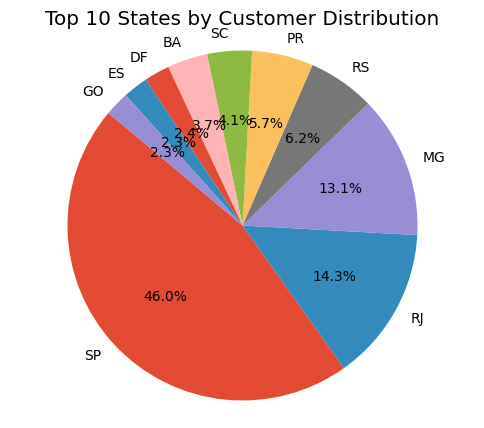

In [14]:
# 상위 10개 주에 대한 데이터 추출
top_states = customers['Customer_state'].value_counts().sort_values(ascending=False).head(10)

# 원 그래프 생성
plt.figure(figsize=(6, 5))  
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 States by Customer Distribution') 
plt.axis('equal')  
plt.show()


state 구글링을 해보니 브라질의 각 주 및 연방 구의 공식적인 약어라고 한다. São Paulo 주 고객이 가장 많다.

### locations

지역과 관련된 정보
- Geolocation_zipcode_prefix : 우편번호 앞부분
- Geolocation_lat : 위도
- Geolocation_lng : 경도
- Geolocation_city : 도시(city)
- Geolocation_state : 주(state)

In [9]:
display(locations.head())
locations.info()

,Geolocation_zipcode_prefix,Geolocation_lat,Geolocation_lng,Geolocation_city,Geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Geolocation_zipcode_prefix  1000163 non-null  int64  
 1   Geolocation_lat             1000163 non-null  float64
 2   Geolocation_lng             1000163 non-null  float64
 3   Geolocation_city            1000163 non-null  object 
 4   Geolocation_state           1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [20]:
data_summary(locations)

,Column Name,count,dtype,nunique,%nunique,%null,min,max
0,Geolocation_zipcode_prefix,1000163,int64,19015,1.901,0.0,1001.000,99990.000
1,Geolocation_lat,1000163,float64,717349,71.723,0.0,-36.605,45.066
2,Geolocation_lng,1000163,float64,717613,71.750,0.0,-101.467,121.105
3,Geolocation_city,1000163,object,8011,0.801,0.0,NaN,NaN
4,Geolocation_state,1000163,object,27,0.003,0.0,NaN,NaN


- 지도 상에 location 표시



In [82]:
import folium
from folium import plugins

# 데이터 프레임에서 위도와 경도 데이터를 추출
data = locations[['Geolocation_lat', 'Geolocation_lng']].values

# 지도의 중심을 데이터의 첫 번째 포인트로 설정하여 지도 객체를 생성
map = folium.Map(location=[data[0][0], data[0][1]], zoom_start=5)
map.add_child(plugins.HeatMap(data, radius=15))

map.save('my_map.html')



### order_items

주문 아이템과 관련된 정보
- Order_id : 주문 고유 ID
- Order_item_id : 동일한 주문에 포함된 품목 수를 식별하는 일련 번호
- Product_id : 제품 고유 ID
- Seller_id : 판매자 고유 ID
- Price : 판매 가격
- Freight_value : 품목 화물 가격

In [10]:
display(order_items.head())
order_items.info()

,Order_id,Order_item_id,Product_id,Seller_id,Price,Freight_value
0,ORDER_75477,1,PRODUCT_23128,SELLER_0452,58.9,13.29
1,ORDER_63604,1,PRODUCT_24351,SELLER_0414,239.9,19.93
2,ORDER_05566,1,PRODUCT_20226,SELLER_1637,199.0,17.87
3,ORDER_04632,1,PRODUCT_07878,SELLER_1445,199.9,18.14
4,ORDER_61452,1,PRODUCT_03505,SELLER_0581,21.9,12.69


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100557 entries, 0 to 100556
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_id       100557 non-null  object 
 1   Order_item_id  100557 non-null  int64  
 2   Product_id     100557 non-null  object 
 3   Seller_id      100557 non-null  object 
 4   Price          100557 non-null  float64
 5   Freight_value  100557 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [22]:
data_summary(order_items)

,Column Name,count,dtype,nunique,%nunique,%null,min,max
0,Order_id,100557,object,87954,87.467,0.0,NaN,NaN
1,Order_item_id,100557,int64,21,0.021,0.0,1.00,21.00
2,Product_id,100557,object,29430,29.267,0.0,NaN,NaN
3,Seller_id,100557,object,2761,2.746,0.0,NaN,NaN
4,Price,100557,float64,5433,5.403,0.0,0.85,6735.00
5,Freight_value,100557,float64,6566,6.530,0.0,0.00,409.68


- Order_id는 87954인데, 


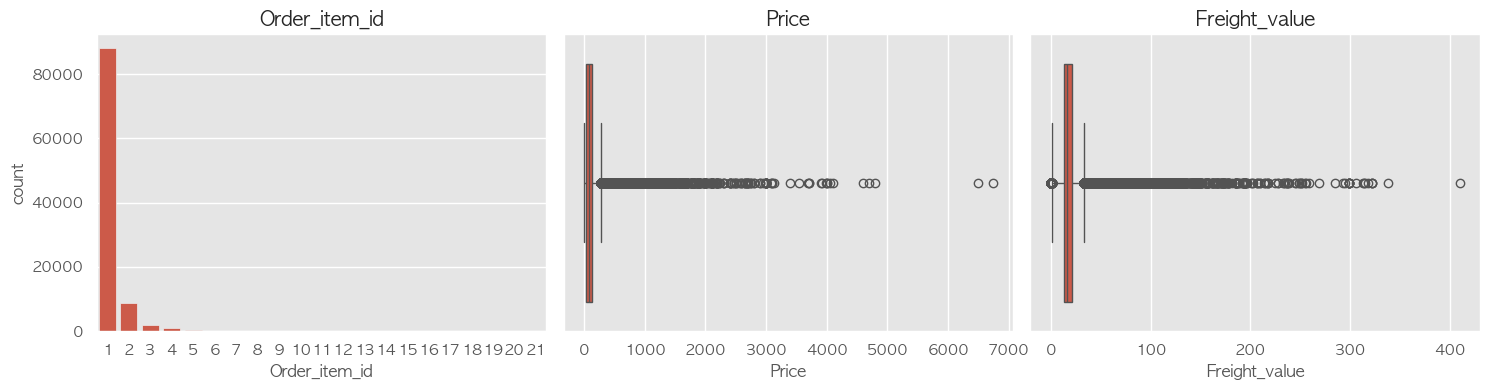

In [30]:
# Figure와 3개의 Axes 생성 (1,3) 구성
fig, axes = plt.subplots(1, 3, figsize=(15,4)) 


sns.countplot(data=order_items, x='Order_item_id', ax=axes[0])
axes[0].set_title("Order_item_id")


sns.boxplot(data=order_items, x='Price', ax=axes[1])
axes[1].set_title("Price")


sns.boxplot(data=order_items, x='Freight_value', ax=axes[2])
axes[2].set_title("Freight_value")

plt.tight_layout()  # 그래프 간격 조정
plt.show()

In [16]:
item_count=order_items.groupby('Order_id').count()['Product_id'].sort_values(ascending=False).reset_index()
item_count

,Order_id,Product_id
0,ORDER_78678,21
1,ORDER_77030,20
2,ORDER_83280,20
3,ORDER_58777,15
4,ORDER_26840,15
...,...,...
87949,ORDER_30939,1
87950,ORDER_30938,1
87951,ORDER_30937,1
87952,ORDER_30936,1


이 데이터가 이상한 게, 고객 수와 주문 수가 같다는 것. 즉 고객이 처음 주문한 데이터만 있고 이후에 어떤 주문을 했는지 알루가없다. 알수 있는 것 고객이 주문시 몇개의 제품을 구매했는지는 알 수 있다. 

### orders

- Order_id : 주문 고유 ID
- Customer_id : 고객 ID
- Order_status : 주문 상태
- Order_purchase_timestamp : 구매 시간
- Order_delivered_carrier_date : 물류 처리 시간
- Order_delivered_customer_date : 실제 배송 날짜
- Order_estimated_delivery_date : 기대 배송 날짜

In [11]:
display(orders.head())
orders.info()

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87955 entries, 0 to 87954
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Order_id                       87955 non-null  object
 1   Customer_id                    87955 non-null  object
 2   Order_status                   87955 non-null  object
 3   Order_purchase_timestamp       87955 non-null  object
 4   Order_delivered_carrier_date   87955 non-null  object
 5   Order_delivered_customer_date  87955 non-null  object
 6   Order_estimated_delivery_date  87955 non-null  object
dtypes: object(7)
memory usage: 4.7+ MB


In [23]:
data_summary(orders)

,Column Name,count,dtype,nunique,%nunique,%null,min,max
0,Order_id,87955,object,87955,100.000,0.0,None,None
1,Customer_id,87955,object,87955,100.000,0.0,None,None
2,Order_status,87955,object,2,0.002,0.0,None,None
3,Order_purchase_timestamp,87955,object,87479,99.459,0.0,None,None
4,Order_delivered_carrier_date,87955,object,75514,85.855,0.0,None,None
5,Order_delivered_customer_date,87955,object,87197,99.138,0.0,None,None
6,Order_estimated_delivery_date,87955,object,417,0.474,0.0,None,None


- Order과 조인해서 어느 시간대에 어떤게 잘팔리는지 확인해보기
- 구매 시간과 물류처리 시간 차이
- 물류처리시간과 실제 배송날짜 차이
- 구매시간과 실제 배송날짜 차이

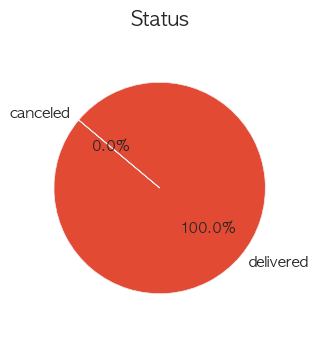

In [40]:
# status 확인
status=orders['Order_status'].value_counts()

plt.figure(figsize=(3, 4))  
plt.pie(status, labels=status.index, autopct='%1.1f%%', startangle=140)
plt.title('Status') 
plt.axis('equal')  
plt.show()


In [43]:
orders['Order_status'].value_counts().to_frame().reset_index()

,Order_status,count
0,delivered,87949
1,canceled,6


In [3]:
#날짜형식으로 바꾸어주기
from datetime import datetime

new_orders=orders.copy()
new_orders['Order_purchase_timestamp']=pd.to_datetime(new_orders['Order_purchase_timestamp'])
new_orders['Order_delivered_carrier_date']=pd.to_datetime(new_orders['Order_delivered_carrier_date'])
new_orders['Order_delivered_customer_date']=pd.to_datetime(new_orders['Order_delivered_customer_date'])
new_orders['Order_estimated_delivery_date']=pd.to_datetime(new_orders['Order_estimated_delivery_date'])

In [7]:
#물류 처리 시간
new_orders['물류처리시간']=new_orders['Order_delivered_date']-new_orders['Order_purchase_date']

#주문 처리 시간
new_orders['주문처리시간']=new_orders['Order_customer_date']-new_orders['Order_purchase_date']

#배송 지연 분석
#위의 데이터를 보니 예상 배송 날짜보다 더 일찍온게 많음
new_orders['배송지연']=new_orders['Order_customer_date']-new_orders['Order_estimated_delivery_date']

In [5]:
#날짜와 시간 분리

new_orders['Order_purchase_date']=new_orders['Order_purchase_timestamp'].apply(lambda x:x.date())
new_orders['Order_purchase_time']=new_orders['Order_purchase_timestamp'].apply(lambda x:x.time())
new_orders['Order_delivered_date']=new_orders['Order_delivered_carrier_date'].apply(lambda x:x.date())
new_orders['Order_delivered_time']=new_orders['Order_delivered_carrier_date'].apply(lambda x:x.time())
new_orders['Order_customer_date']=new_orders['Order_delivered_customer_date'].apply(lambda x:x.date())
new_orders['Order_customer_time']=new_orders['Order_delivered_customer_date'].apply(lambda x:x.time())

new_orders['Order_purchase_date']=pd.to_datetime(new_orders['Order_purchase_date'])
new_orders['Order_delivered_date']=pd.to_datetime(new_orders['Order_delivered_date'])
new_orders['Order_customer_date']=pd.to_datetime(new_orders['Order_customer_date'])

In [8]:
#describe
new_orders.describe()

,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,물류처리시간,주문처리시간,배송지연,Order_purchase_date,Order_delivered_date,Order_customer_date
count,87955,87955,87955,87955,87955,87955,87955,87955,87955,87955
mean,2018-12-12 02:00:47.680597760,2018-12-15 08:18:43.581695232,2018-12-24 23:44:32.571712768,2019-01-05 12:19:24.540958720,3 days 05:46:43.583650730,12 days 20:16:39.183673469,-13 days +18:41:25.025297027,2018-12-11 10:44:10.382582016,2018-12-14 16:30:53.966233088,2018-12-24 07:00:49.566255616
min,2017-09-15 12:16:38,2017-10-08 10:34:01,2017-10-11 13:46:32,2017-10-04 00:00:00,0 days 00:00:00,0 days 00:00:00,-147 days +00:00:00,2017-09-15 00:00:00,2017-10-08 00:00:00,2017-10-11 00:00:00
25%,2018-08-30 13:44:51,2018-09-01 19:09:00,2018-09-11 22:29:38,2018-09-21 00:00:00,1 days 00:00:00,7 days 00:00:00,-17 days +00:00:00,2018-08-30 00:00:00,2018-09-01 00:00:00,2018-09-11 00:00:00
50%,2019-01-03 11:18:09,2019-01-05 21:33:59,2019-01-16 14:42:44,2019-01-30 00:00:00,2 days 00:00:00,11 days 00:00:00,-13 days +00:00:00,2019-01-03 00:00:00,2019-01-05 00:00:00,2019-01-16 00:00:00
75%,2019-04-08 18:42:10,2019-04-11 11:41:55.500000,2019-04-20 22:41:21.500000,2019-05-02 00:00:00,4 days 00:00:00,16 days 00:00:00,-8 days +00:00:00,2019-04-08 00:00:00,2019-04-11 00:00:00,2019-04-20 00:00:00
max,2019-07-30 13:26:53,2019-07-30 20:10:00,2019-07-31 23:44:41,2019-09-06 00:00:00,126 days 00:00:00,210 days 00:00:00,181 days 00:00:00,2019-07-30 00:00:00,2019-07-30 00:00:00,2019-07-31 00:00:00
std,NaN,NaN,NaN,NaN,3 days 13:42:17.384676893,9 days 16:20:05.641319909,10 days 05:03:10.101793600,NaN,NaN,NaN


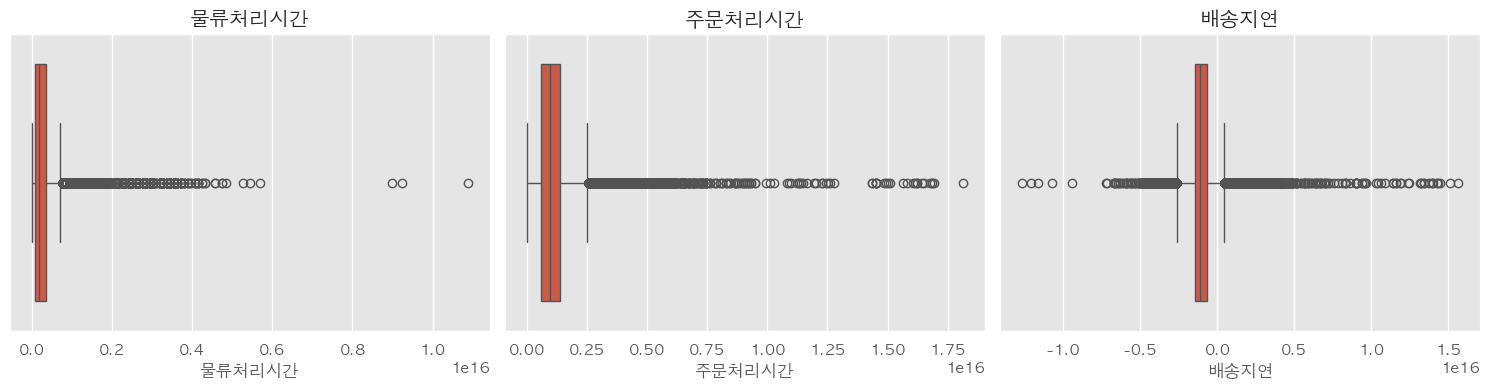

In [9]:
# Figure와 3개의 Axes 생성 (1,3) 구성
fig, axes = plt.subplots(1, 3, figsize=(15,4)) 

sns.boxplot(data=new_orders, x='물류처리시간', ax=axes[0])
axes[0].set_title("물류처리시간")


sns.boxplot(data=new_orders, x='주문처리시간', ax=axes[1])
axes[1].set_title("주문처리시간")


sns.boxplot(data=new_orders, x='배송지연', ax=axes[2])
axes[2].set_title("배송지연")

plt.tight_layout()  # 그래프 간격 조정
plt.show()

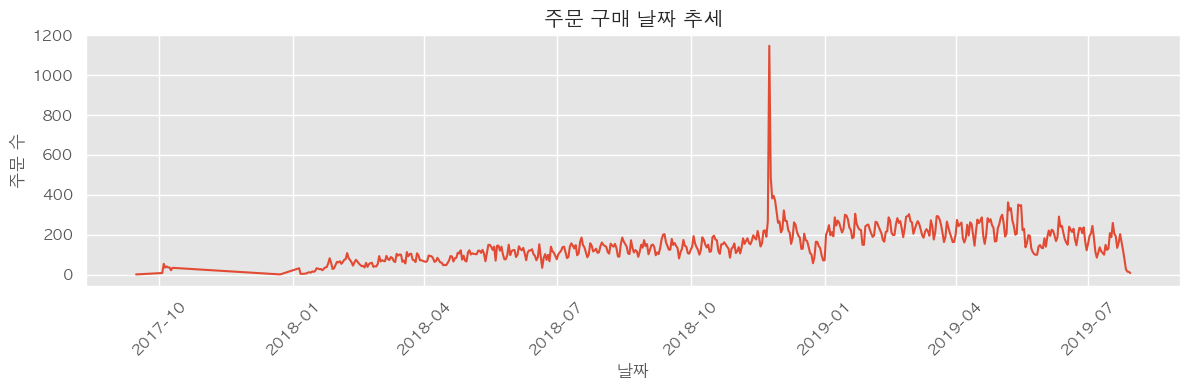

In [85]:
# 날짜별 주문 수 계산
order_counts_per_day = new_orders.groupby('Order_purchase_date').size().reset_index(name='counts')

# 시각화
plt.figure(figsize=(12, 4))  # 그래프 크기 설정
sns.lineplot(data=order_counts_per_day, x='Order_purchase_date', y='counts')  # 선 그래프 그리기
plt.title('주문 구매 날짜 추세')  # 그래프 제목
plt.xlabel('날짜')  # x축 라벨
plt.ylabel('주문 수')  # y축 라벨
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()  # 그래프 레이아웃 조정
plt.show()  # 그래프 보이기


In [11]:
print(min(orders['Order_purchase_timestamp']))
print(max(orders['Order_purchase_timestamp']))

2017-09-15 12:16:38
2019-07-30 13:26:53


### Payments

지불과 관련된 정보
- Order_id : 주문 고유 ID
- Payment_sequential : 결제 시퀀스(둘 이상의 결제 방법으로 결제 가능)
- Payment_type : 지불 방법
- Payment_installments : 할부 횟수
- Payment_value : 거래 가치

In [24]:
display(payments.head())
payments.info()

,Order_id,Payment_sequential,Payment_type,Payment_installments,Payment_value
0,ORDER_66617,1,credit_card,8,99.33
1,ORDER_86954,1,credit_card,1,24.39
2,ORDER_38852,1,credit_card,1,65.71
3,ORDER_57443,1,credit_card,8,107.78
4,ORDER_11244,1,credit_card,2,128.45


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91971 entries, 0 to 91970
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_id              91971 non-null  object 
 1   Payment_sequential    91971 non-null  int64  
 2   Payment_type          91971 non-null  object 
 3   Payment_installments  91971 non-null  int64  
 4   Payment_value         91971 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.5+ MB


In [27]:
data_summary(payments)

,Column Name,count,dtype,nunique,%nunique,%null,min,max
0,Order_id,91971,object,87954,95.632,0.0,NaN,NaN
1,Payment_sequential,91971,int64,26,0.028,0.0,1.0,26.00
2,Payment_type,91971,object,4,0.004,0.0,NaN,NaN
3,Payment_installments,91971,int64,24,0.026,0.0,0.0,24.00
4,Payment_value,91971,float64,27061,29.423,0.0,0.0,13664.08


In [24]:
payments.describe()

,Payment_sequential,Payment_installments,Payment_value
count,91971.000000,91971.000000,91971.000000
mean,1.092464,2.862370,152.649857
std,0.676222,2.693001,213.587538
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.615000
50%,1.000000,1.000000,99.920000
75%,1.000000,4.000000,170.885000
max,26.000000,24.000000,13664.080000


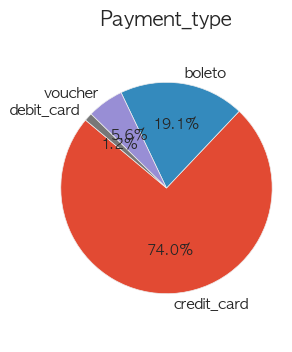

In [10]:
#결제 방식 비율 확인

status=payments['Payment_type'].value_counts()

plt.figure(figsize=(3, 4))  
plt.pie(status, labels=status.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment_type') 
plt.axis('equal')  
plt.show()

<Axes: title={'center': '할부 횟수'}, xlabel='Payment_installments'>

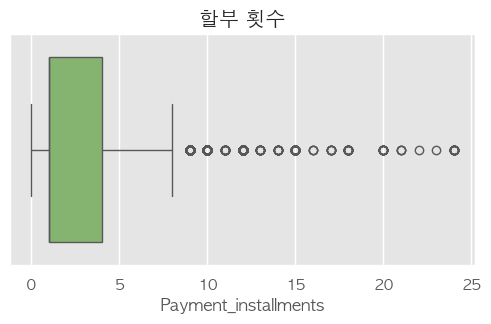

In [22]:
#할부횟수

plt.figure(figsize=(6,3))
plt.title('할부 횟수')
sns.boxplot(data=payments,x='Payment_installments',palette='summer')

Text(0.5, 1.0, '거래가치 히스토그램')

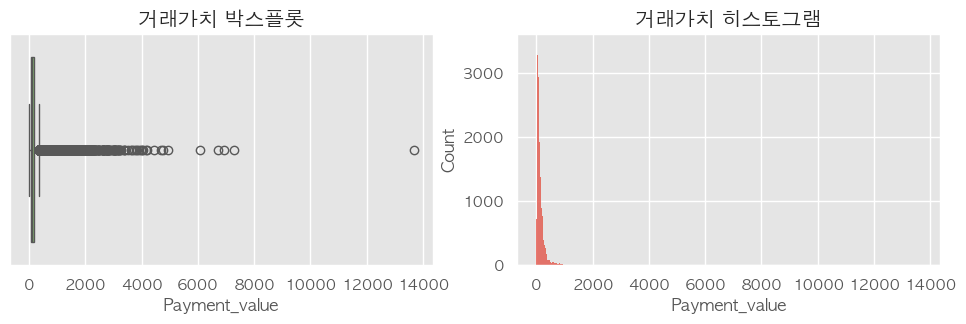

In [23]:
#거래가치

fig,axes=plt.subplots(1,2,figsize=(12,3))

sns.boxplot(data=payments,x='Payment_value',ax=axes[0],palette='summer')
axes[0].set_title("거래가치 박스플롯")

sns.histplot(data=payments,x='Payment_value',ax=axes[1],palette='summer')
axes[1].set_title("거래가치 히스토그램")

### products

제품과 관련된 정보
- Product_id : 제품 고유 ID
- Product_category_name : 카테고리 이름
- Product_weight_g : 제품 무게(g)
- Product_length_cm : 제품 길이(cm)
- Product_height_cm : 제품 높이(cm)
- Product_width_cm : 제품 너비(cm)

In [37]:
display(products.head())
products.info()

,Product_id,Product_category_name,Product_weight_g,Product_length_cm,Product_height_cm,Product_width_cm
0,PRODUCT_00000,perfumery,225.0,16.0,10.0,14.0
1,PRODUCT_00001,arts,1000.0,30.0,18.0,20.0
2,PRODUCT_00002,sports_leisure,154.0,18.0,9.0,15.0
3,PRODUCT_00003,home_utilities,625.0,20.0,17.0,13.0
4,PRODUCT_00004,musical_instruments,200.0,38.0,5.0,11.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29471 entries, 0 to 29470
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Product_id             29471 non-null  object
 1   Product_category_name  29471 non-null  object
 2   Product_weight_g       29471 non-null  object
 3   Product_length_cm      29471 non-null  object
 4   Product_height_cm      29471 non-null  object
 5   Product_width_cm       29471 non-null  object
dtypes: object(6)
memory usage: 1.3+ MB


In [29]:
data_summary(products)

,Column Name,count,dtype,nunique,%nunique,%null,min,max
0,Product_id,29471,object,29471,100.000,0.0,None,None
1,Product_category_name,29471,object,72,0.244,0.0,None,None
2,Product_weight_g,29471,object,2092,7.099,0.0,None,None
3,Product_length_cm,29471,object,100,0.339,0.0,None,None
4,Product_height_cm,29471,object,103,0.349,0.0,None,None
5,Product_width_cm,29471,object,95,0.322,0.0,None,None


In [42]:
# 'Unknown' 값을 NaN으로 변경
products.replace('Unknown', np.nan, inplace=True)

# NaN 값을 포함하는 행 삭제
products.dropna(inplace=True)

In [43]:
#object형식 바꾸어주기

products['Product_weight_g']=products['Product_weight_g'].astype('float')
products['Product_length_cm']=products['Product_length_cm'].astype('float')
products['Product_height_cm']=products['Product_height_cm'].astype('float')
products['Product_width_cm']=products['Product_width_cm'].astype('float')

<Axes: title={'center': 'Top 10 products category'}, xlabel='Product_category_name', ylabel='count'>

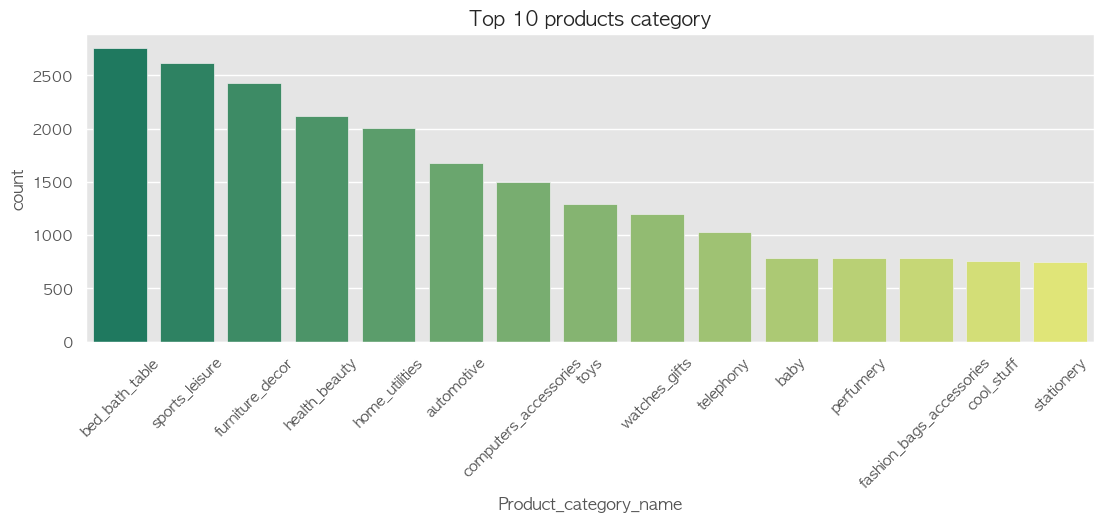

In [33]:
#category top 15

top10_products=products['Product_category_name'].value_counts().sort_values(ascending=False)[:15].reset_index()
plt.figure(figsize=(13,4))
plt.title('Top 10 products category')
plt.xticks(rotation=45)
sns.barplot(data=top10_products,x='Product_category_name',y='count',palette='summer')

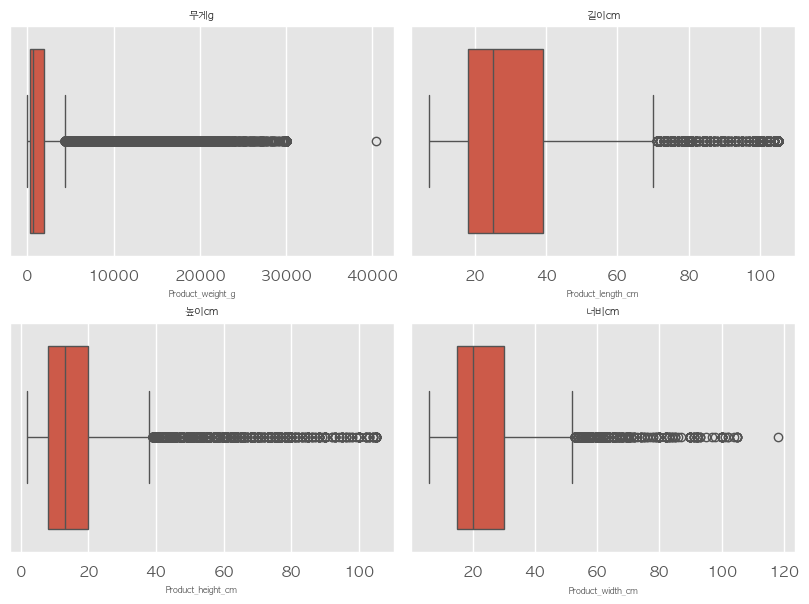

In [51]:
#크기
plt.rcParams.update({'font.size': 5}) 
fig,axes=plt.subplots(2,2,figsize=(8,6))

sns.boxplot(data=products,x='Product_weight_g',ax=axes[0][0])
axes[0][0].set_title("무게g")

sns.boxplot(data=products,x='Product_length_cm',ax=axes[0][1])
axes[0][1].set_title("길이cm")

sns.boxplot(data=products,x='Product_height_cm',ax=axes[1][0])
axes[1][0].set_title("높이cm")

sns.boxplot(data=products,x='Product_width_cm',ax=axes[1][1])
axes[1][1].set_title("너비cm")

plt.tight_layout()  # 그래프 간격 조정
plt.show()

### reviews

- Review_id : 리뷰 고유 ID
- Order_id : 주문 고유 ID
- Review_score : 리뷰 점수
- Review_creation_date : 리뷰 생성 시간
- Review_answer_timestamp : 리뷰 답변 시간

In [31]:
display(reviews.head())
reviews.info()

,Review_id,Order_id,Review_score,Review_creation_date,Review_answer_timestamp
0,REVIEW_00000,ORDER_01674,4,2019-01-18 00:00:00,2019-01-18 21:46:59
1,REVIEW_00001,ORDER_80140,5,2019-03-10 00:00:00,2019-03-11 03:05:13
2,REVIEW_00002,ORDER_69816,5,2019-02-17 00:00:00,2019-02-18 14:36:24
3,REVIEW_00003,ORDER_24398,5,2018-04-21 00:00:00,2018-04-21 22:02:06
4,REVIEW_00004,ORDER_70366,5,2019-03-01 00:00:00,2019-03-02 10:26:53


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87873 entries, 0 to 87872
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Review_id                87873 non-null  object
 1   Order_id                 87873 non-null  object
 2   Review_score             87873 non-null  int64 
 3   Review_creation_date     87873 non-null  object
 4   Review_answer_timestamp  87873 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [32]:
data_summary(reviews)

,Column Name,count,dtype,nunique,%nunique,%null,min,max
0,Review_id,87873,object,87173,99.203,0.0,NaN,NaN
1,Order_id,87873,object,87349,99.404,0.0,NaN,NaN
2,Review_score,87873,int64,5,0.006,0.0,1.0,5.0
3,Review_creation_date,87873,object,602,0.685,0.0,NaN,NaN
4,Review_answer_timestamp,87873,object,87035,99.046,0.0,NaN,NaN


In [81]:
reviews.describe()

,Review_score,Review_creation_date,Review_answer_timestamp,Response_time_hours
count,87873.000000,87873,87873,87873.000000
mean,4.144686,2018-12-24 13:41:33.981086464,2018-12-27 18:29:57.529980928,76.308946
min,1.000000,2017-10-06 00:00:00,2017-10-07 18:32:28,2.000000
25%,4.000000,2018-09-12 00:00:00,2018-09-15 00:34:10,24.000000
50%,5.000000,2019-01-16 00:00:00,2019-01-18 20:34:52,40.000000
75%,5.000000,2019-04-20 00:00:00,2019-04-23 13:25:44,75.000000
max,5.000000,2019-08-19 00:00:00,2019-10-26 21:36:41,12448.000000
std,1.292603,NaN,NaN,244.008451


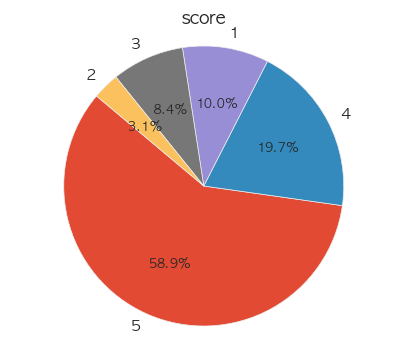

In [54]:
#결제 방식 비율 확인
plt.rcParams.update({'font.size': 9}) 
score=reviews['Review_score'].value_counts()

plt.figure(figsize=(5, 4))  
plt.pie(score, labels=score.index, autopct='%1.1f%%', startangle=140)
plt.title('score') 
plt.axis('equal')  
plt.show()

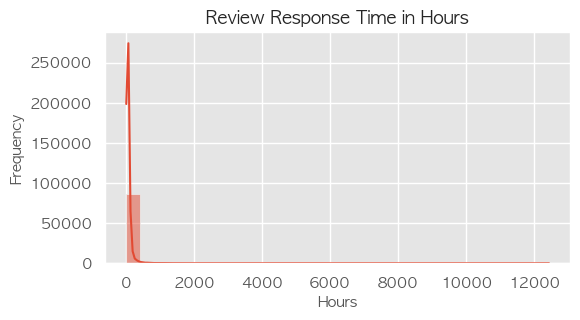

In [56]:
# 날짜 컬럼을 datetime 형식으로 변환
reviews['Review_creation_date'] = pd.to_datetime(reviews['Review_creation_date'])
reviews['Review_answer_timestamp'] = pd.to_datetime(reviews['Review_answer_timestamp'])

# 두 날짜의 차이 계산 (시간 단위로)
reviews['Response_time_hours'] = (reviews['Review_answer_timestamp'] - reviews['Review_creation_date']).dt.total_seconds() / 3600

# 히스토그램을 사용한 시각화
plt.figure(figsize=(6, 3))
sns.histplot(reviews['Response_time_hours'], bins=30, kde=True)
plt.title('Review Response Time in Hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

In [62]:
reviews['Response_time_hours']=reviews['Response_time_hours'].astype('int')


<Axes: title={'center': 'Response_time_hours'}, xlabel='Response_time_hours', ylabel='count'>

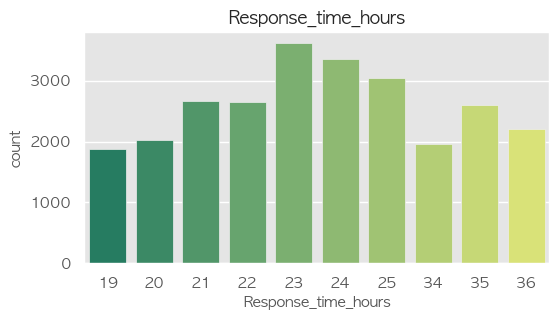

In [80]:
top10_response_time=reviews['Response_time_hours'].value_counts().sort_values(ascending=False)[:10].reset_index()

plt.figure(figsize=(6, 3))
plt.title('Response_time_hours')
sns.barplot(data=top10_response_time,x='Response_time_hours',y='count',palette='summer')

### sellers

- Seller_id : 판매자 고유 ID
- Seller_zipcode_prefix : 판매자 우편번호 앞자리
- Seller_city : 판매자 도시(city)
- Seller_state : 판매자 주(state)

In [33]:
display(sellers.head())
sellers.info()

,Seller_id,Seller_zipcode_prefix,Seller_city,Seller_state
0,SELLER_0000,13023,campinas,SP
1,SELLER_0001,13844,mogi guacu,SP
2,SELLER_0002,12914,braganca paulista,SP
3,SELLER_0003,20920,rio de janeiro,RJ
4,SELLER_0004,55325,brejao,PE


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763 entries, 0 to 2762
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Seller_id              2763 non-null   object
 1   Seller_zipcode_prefix  2763 non-null   int64 
 2   Seller_city            2763 non-null   object
 3   Seller_state           2763 non-null   object
dtypes: int64(1), object(3)
memory usage: 86.5+ KB


In [34]:
data_summary(sellers)

,Column Name,count,dtype,nunique,%nunique,%null,min,max
0,Seller_id,2763,object,2763,100.000,0.0,NaN,NaN
1,Seller_zipcode_prefix,2763,int64,2049,74.159,0.0,1001.0,99730.0
2,Seller_city,2763,object,572,20.702,0.0,NaN,NaN
3,Seller_state,2763,object,22,0.796,0.0,NaN,NaN


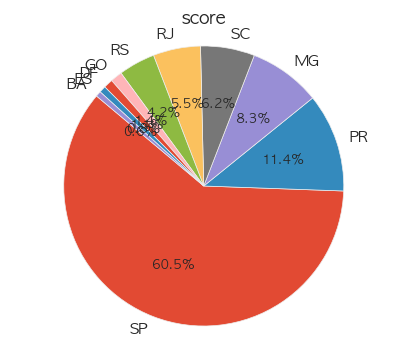

In [86]:
#seller city 확인

top10_state=sellers['Seller_state'].value_counts().sort_values(ascending=False)[:10]


plt.figure(figsize=(5, 4))  
plt.pie(top10_state, labels=top10_state.index, autopct='%1.1f%%', startangle=140)
plt.title('score') 
plt.axis('equal')  
plt.show()



## 고객 평균 구매액 및 주문 항목 수


### 다수 구매가 높은 물건 카테고리

In [3]:
orders_items_combined=pd.merge(orders,order_items,on='Order_id')
orders_items_combined['total_quantity']=orders_items_combined.groupby('Order_id')['Product_id'].transform('count')
order_product=pd.merge(orders_items_combined,products,on='Product_id')

category_purchase_avg=order_product.groupby('Product_category_name')['total_quantity'].mean().reset_index()

category_purchase_avg_sorted = category_purchase_avg.sort_values(by='total_quantity', ascending=False).reset_index()
category_purchase_avg_sorted[:10]


,index,Product_category_name,total_quantity
0,22,diapers_hygiene,2.636364
1,62,signaling_and_security,2.170588
2,56,office_furniture,2.012698
3,23,drinks,2.000000
4,31,fashion_womens_clothing,1.833333
5,19,construction_tools_lighting,1.779817
6,49,landline_phones,1.771784
7,35,furniture_decor,1.766208
8,50,living_room_furniture,1.745413
9,43,home_construction,1.740038


In [76]:
category_purchase_avg_sorted=category_purchase_avg_sorted.drop('index',axis=1)
category_purchase_avg_sorted.to_csv('data/category_total_quantity.csv',index=False)

### 구매액이 높은 카테고리


In [5]:
order_product['payment_value']=order_product['Freight_value']+order_product['Price']
sale_category=order_product.groupby('Product_category_name')['payment_value'].mean().sort_values(ascending=False).reset_index()
sale_category[:20]

,Product_category_name,payment_value
0,pcs,1148.955275
1,portable_home_oven_and_coffee,893.088400
2,home_appliances_2,518.264279
3,agro_industry_and_commerce,376.534167
4,musical_instruments,314.813451
5,small_appliances,302.065272
6,construction_tools_safety,244.293816
7,bedroom_furniture,233.001852
8,landline_phones,228.553983
9,watches_gifts,218.122557


### 같이 구매하는 물품 카테고리

In [7]:
import pandas as pd
from itertools import combinations
from collections import Counter


order_categories = order_product.groupby('Order_id')['Product_category_name'].apply(lambda x: list(set(x)))

category_combinations = Counter()

for categories in order_categories:
    if len(categories) > 1:
        for combo in combinations(sorted(categories), 2): 
            category_combinations[combo] += 1

most_common_combos = category_combinations.most_common(25)

for combo, count in most_common_combos:
    print(f'{combo}: {count}번')


('bed_bath_table', 'furniture_decor'): 64번
('bed_bath_table', 'home_comfort'): 42번
('furniture_decor', 'home_utilities'): 22번
('baby', 'cool_stuff'): 20번
('bed_bath_table', 'home_utilities'): 17번
('baby', 'toys'): 16번
('baby', 'bed_bath_table'): 15번
('furniture_decor', 'garden_tools'): 14번
('Unknown', 'home_utilities'): 13번
('health_beauty', 'sports_leisure'): 11번
('health_beauty', 'perfumery'): 11번
('furniture_decor', 'home_construction'): 11번
('bed_bath_table', 'health_beauty'): 10번
('bed_bath_table', 'cool_stuff'): 10번
('baby', 'furniture_decor'): 10번
('Unknown', 'fashion_bags_accessories'): 9번
('home_utilities', 'sports_leisure'): 9번
('garden_tools', 'home_utilities'): 9번
('computers_accessories', 'garden_tools'): 8번
('Unknown', 'bed_bath_table'): 7번
('furniture_decor', 'watches_gifts'): 7번
('construction_tools_lighting', 'furniture_decor'): 6번
('Unknown', 'sports_leisure'): 6번
('furniture_decor', 'home_comfort'): 6번
('computers_accessories', 'telephony'): 6번
